<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/NLP_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/drive/MyDrive/dane/password/password.csv",on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.shape

(669640, 2)

In [3]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [3]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

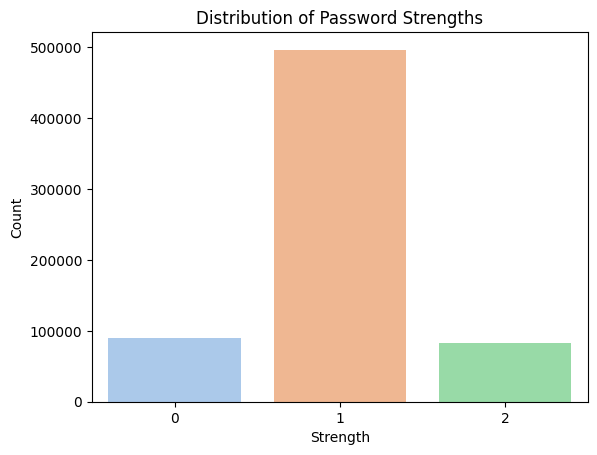

In [7]:
sns.countplot(x='strength', data=data, palette = 'pastel')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths')
plt.show()

In [4]:
x = np.array(data["password"])
y = np.array(data["strength"])

In [5]:
def word(password):
  character=[]
  for i in password:
    character.append(i)
  return character

In [6]:
# użycie wektoryzatora TF-IDF do konwersji danych łańcuchowych na dane numeryczne
tdif = TfidfVectorizer(tokenizer=word)
X = tdif.fit_transform(x)

In [26]:
tdif.vocabulary_

{'k': 66,
 'z': 81,
 'd': 59,
 'e': 60,
 '5': 39,
 '7': 41,
 'i': 64,
 'n': 69,
 'o': 70,
 '3': 37,
 '4': 38,
 'v': 77,
 's': 74,
 '1': 35,
 'y': 80,
 'r': 73,
 'm': 68,
 'g': 62,
 '2': 36,
 'l': 67,
 'a': 56,
 'b': 57,
 'h': 63,
 'q': 72,
 'f': 61,
 't': 75,
 'u': 76,
 '6': 40,
 'c': 58,
 '8': 42,
 'w': 78,
 '9': 43,
 '0': 34,
 'j': 65,
 'p': 71,
 '@': 49,
 '-': 31,
 'x': 79,
 '.': 32,
 '>': 47,
 '&': 26,
 '?': 48,
 '<': 45,
 '!': 21,
 ';': 44,
 '_': 54,
 '%': 25,
 '±': 99,
 '"': 22,
 '~': 85,
 '+': 30,
 '^': 53,
 '/': 33,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 138,
 '*': 29,
 '`': 55,
 '{': 82,
 '}': 84,
 '[': 50,
 ']': 52,
 'þ': 142,
 'ó': 132,
 'ô': 133,
 '=': 46,
 '\\': 51,
 '\x1c': 17,
 '³': 101,
 '¿': 112,
 '\x16': 12,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 120,
 '‚': 147,
 'ä': 119,
 'à': 115,
 'õ': 134,
 'ß': 114,
 '´': 102,
 '«': 96,
 'ð': 129,
 'â': 117,
 '°': 98,
 '|': 83,
 '\x7f': 86,
 '²': 100,
 '¾': 111,
 'ÿ': 143,

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(535711, 153)

In [40]:
print(X_train[100])

  (0, 43)	0.6031492443231428
  (0, 76)	0.30008722223156997
  (0, 63)	0.33527751894445246
  (0, 36)	0.5009644168746293
  (0, 80)	0.32266784889940037
  (0, 37)	0.28047770986000037


In [41]:
X_train[100]

<1x153 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [10]:
print(X[10])

  (0, 43)	0.35698643102654715
  (0, 76)	0.355225733827577
  (0, 56)	0.2468947619766872
  (0, 80)	0.3819553613629235
  (0, 74)	0.3363639074639537
  (0, 77)	0.44401576079971
  (0, 70)	0.30401524376104244
  (0, 39)	0.3698817405632923


In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# proces uczenia trwa: 20 minut  (przy aktywnym procesorze T4 GPU i powiększonej do 51 GB  pamięci RAM)
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
import joblib

In [15]:
joblib.dump(model, '/content/drive/MyDrive/dane/modele/forestclassfier.pkl')

['/content/drive/MyDrive/dane/modele/forestclassfier.pkl']

In [16]:
model_loaded = joblib.load('/content/drive/MyDrive/dane/modele/forestclassfier.pkl')

In [17]:
model_loaded.score(X_test, y_test)

0.9565363478884177

In [18]:
y_pred=model_loaded.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 2, 1])

In [24]:
usrpwd = input("Podaj hasło: ")
data = tdif.transform([usrpwd]).toarray()
pwd_strength = model_loaded.predict(data)

Podaj hasło: 123


In [25]:
pwd_strength[0]

0

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17908
           1       0.96      0.99      0.97     99519
           2       0.96      0.91      0.93     16501

    accuracy                           0.96    133928
   macro avg       0.96      0.91      0.93    133928
weighted avg       0.96      0.96      0.96    133928



In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[14820  3083     5]
 [  629 98297   593]
 [   29  1482 14990]]
0.9565363478884177


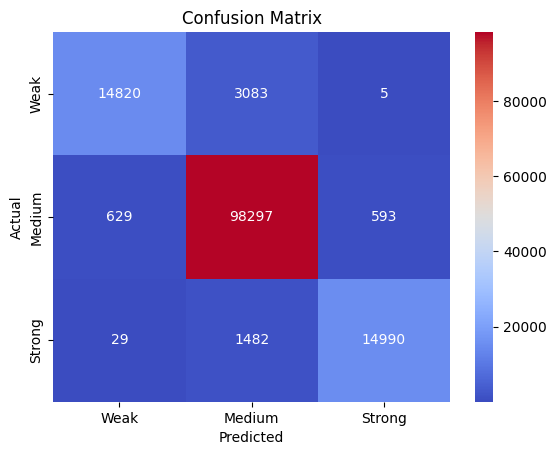

4

In [23]:
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak','Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
4